<a href="https://colab.research.google.com/github/vinay0145/-Data-Science-Capstone-Project-/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. DATA EXPLORATION SUMMARY

In [ ]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv("CAR DETAILS.csv")

# Step 2: Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Step 3: Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Step 4: Reset the index after dropping duplicates (optional)
df_cleaned.reset_index(drop=True, inplace=True)

# Step 5: Display data types to ensure they are appropriate
print("\nData types:")
print(df_cleaned.dtypes)

# Step 6: Final shape of the cleaned dataset
print("\nShape after cleaning:", df_cleaned.shape)

# Optional: Save the cleaned dataset to a new CSV file
df_cleaned.to_csv("CAR_DETAILS_CLEANED.csv", index=False)

# Show sample of cleaned data
print("\nCleaned data preview:")
print(df_cleaned.head())


Missing values before cleaning:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Data types:
name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

Shape after cleaning: (3577, 8)

Cleaned data preview:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual  

In [ ]:
# 2. DATA CLEANING AND DATA PRE PROCESSING

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Use df_cleaned directly without saving/loading
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Now df_cleaned is your preprocessed dataset
print("Preprocessed dataset sample:")
print(df_cleaned.head())


Preprocessed dataset sample:
                       name  year  selling_price  km_driven  fuel  \
0             Maruti 800 AC  2007          60000      70000     4   
1  Maruti Wagon R LXI Minor  2007         135000      50000     4   
2      Hyundai Verna 1.6 SX  2012         600000     100000     1   
3    Datsun RediGO T Option  2017         250000      46000     4   
4     Honda Amaze VX i-DTEC  2014         450000     141000     1   

   seller_type  transmission  owner  
0            1             1      0  
1            1             1      0  
2            1             1      0  
3            1             1      0  
4            1             1      2  


/tmp/ipython-input-2-1894647135.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
/tmp/ipython-input-2-1894647135.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
/tmp/ipython-input-2-1894647135.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [ ]:
 # 3. Handling null values, One-Hot
 Encoding, Imputation and Scaling of Data Pre-Processing where
 necessary.


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("CAR DETAILS.csv")

# 1. Drop high-cardinality column (optional)
df = df.drop(columns=['name'])

# 2. Check for null values (none in this dataset, but code included for general use)
if df.isnull().sum().sum() > 0:
    # Impute numerical columns with median, categorical with mode
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')

    df[num_cols] = num_imputer.fit_transform(df[num_cols])
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# 3. One-Hot Encoding for categorical columns
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Feature Scaling
scaler = StandardScaler()
numerical_cols = ['year', 'selling_price', 'km_driven']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 5. Final preprocessed DataFrame
print(df.head())


       year  selling_price  km_driven  fuel_Diesel  fuel_Electric  fuel_LPG  \
0 -1.445074      -0.767746   0.081139        False          False     False   
1 -1.445074      -0.638096  -0.347689        False          False     False   
2 -0.258795       0.165731   0.724381         True          False     False   
3  0.927485      -0.439300  -0.433455        False          False     False   
4  0.215717      -0.093568   1.603479         True          False     False   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0         True                    True                         False   
1         True                    True                         False   
2        False                    True                         False   
3         True                    True                         False   
4        False                    True                         False   

   transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
0                 

In [ ]:
# 4.EDA with Graphical Analysis

First 5 rows:
                        name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

Shape of data: (4340, 8)

Column names: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

Data types:
 name             object
year              int64
selling_price     int64
km_driven         int64
fuel             o

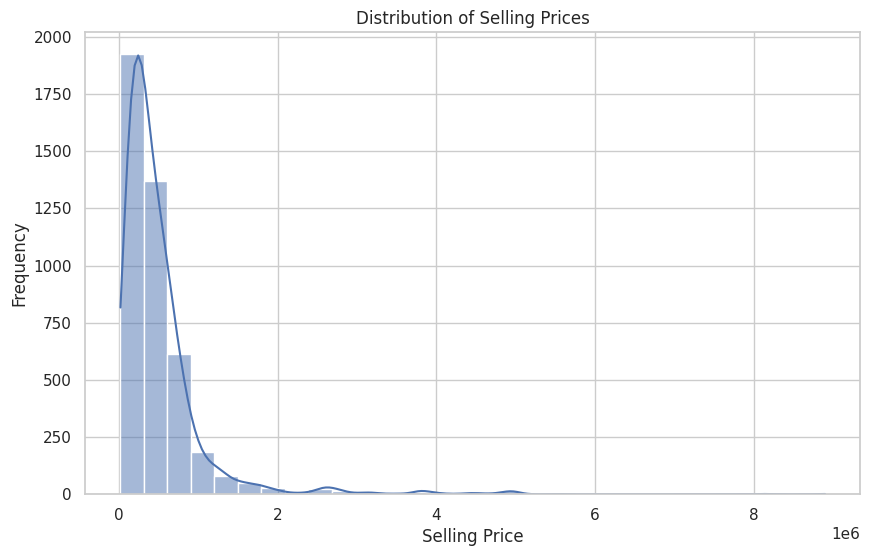

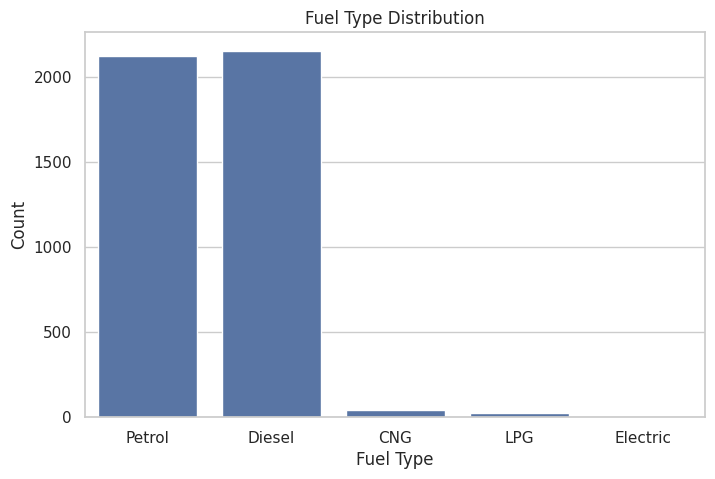

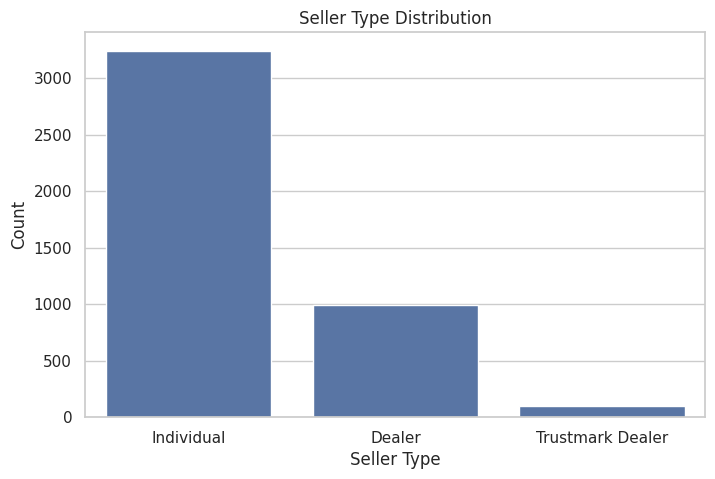

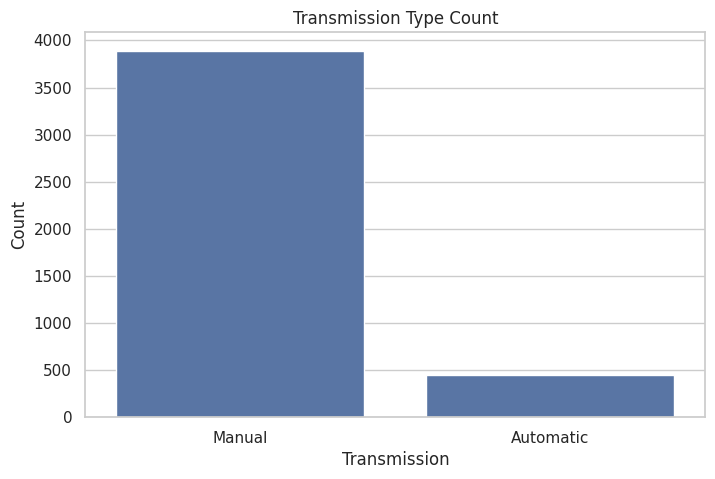

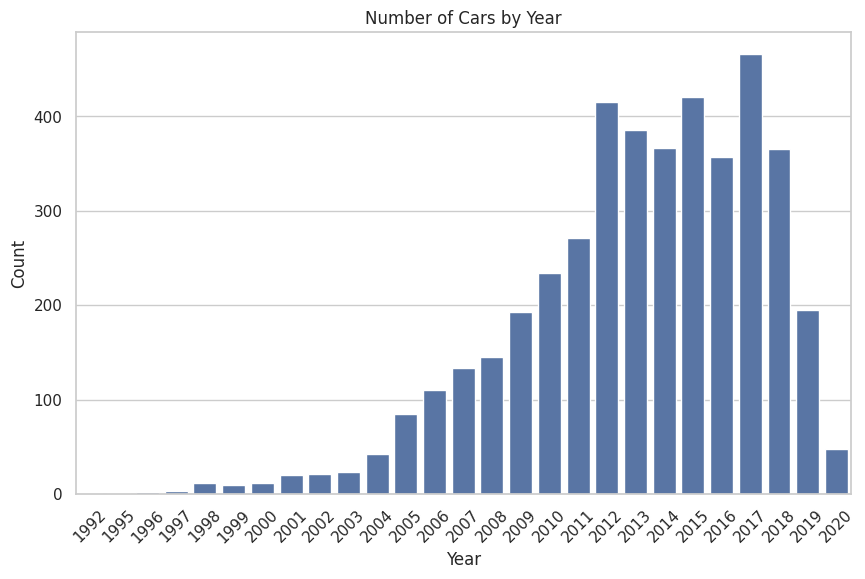

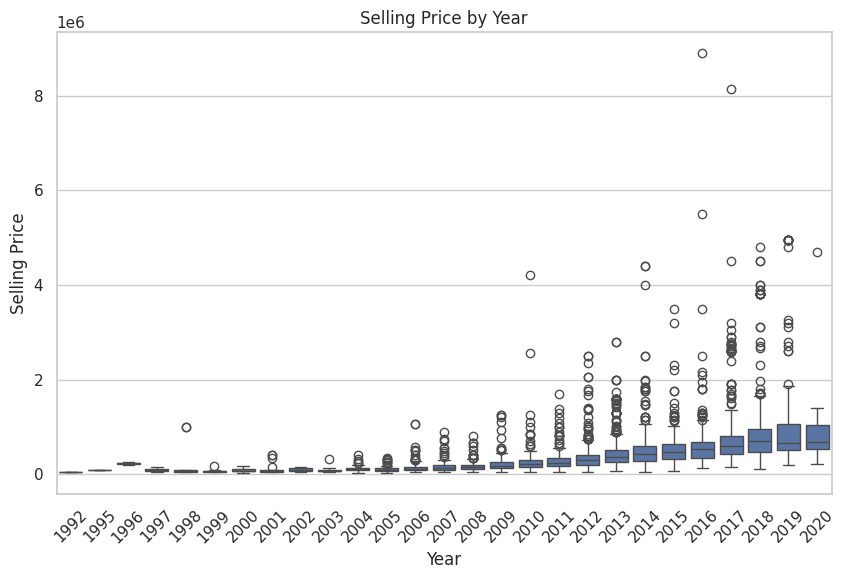

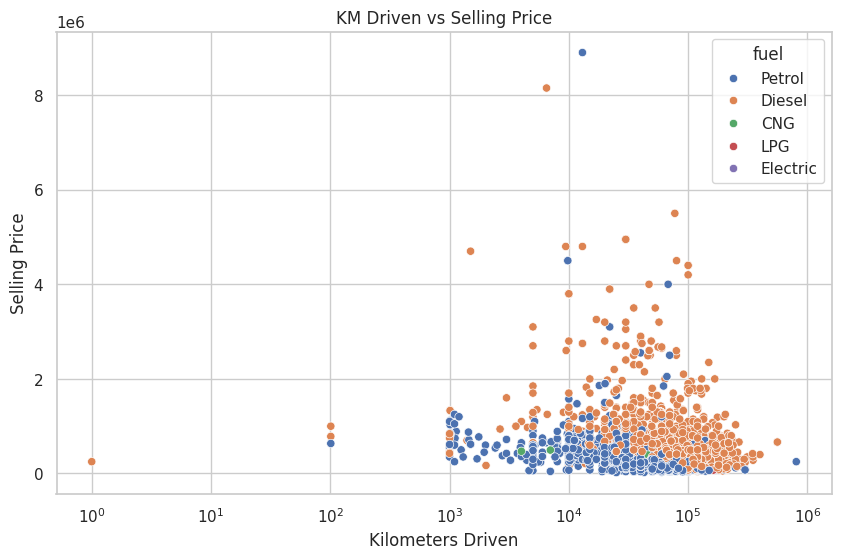

In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
df = pd.read_csv("CAR DETAILS.csv")

# 3. Basic Info
print("First 5 rows:\n", df.head())
print("\nShape of data:", df.shape)
print("\nColumn names:", df.columns)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# 4. Summary Statistics
print("\nStatistical Summary:\n", df.describe(include='all'))

# 5. Unique values in categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':", df[col].unique())

# 6. Graphical Analysis

# Set up styling
sns.set(style="whitegrid")

# 6.1 Distribution of Car Prices
plt.figure(figsize=(10,6))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

# 6.2 Count of Fuel Types
plt.figure(figsize=(8,5))
sns.countplot(x='fuel', data=df)
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

# 6.3 Seller Type Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='seller_type', data=df)
plt.title("Seller Type Distribution")
plt.xlabel("Seller Type")
plt.ylabel("Count")
plt.show()

# 6.4 Transmission Type
plt.figure(figsize=(8,5))
sns.countplot(x='transmission', data=df)
plt.title("Transmission Type Count")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.show()

# 6.5 Year-wise Car Count
plt.figure(figsize=(10,6))
sns.countplot(x='year', data=df, order=sorted(df['year'].unique()))
plt.title("Number of Cars by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 6.6 Selling Price vs. Year
plt.figure(figsize=(10,6))
sns.boxplot(x='year', y='selling_price', data=df)
plt.title("Selling Price by Year")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.xticks(rotation=45)
plt.show()

# 6.7 Kilometers Driven vs. Selling Price
plt.figure(figsize=(10,6))
sns.scatterplot(x='km_driven', y='selling_price', hue='fuel', data=df)
plt.title("KM Driven vs Selling Price")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.xscale('log')  # Optional: makes visualization better
plt.show()


In [ ]:
# 5. Preparing  Data for Machine Learning modeling

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Step 2: Load the Dataset
df = pd.read_csv('/content/CAR DETAILS.csv')

# Step 3: Display basic info
print("Dataset Head:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

# Step 4: Drop rows with null values (if any)
df.dropna(inplace=True)

# Step 5: Encoding Categorical Variables
# Label Encoding for 'fuel', 'seller_type', 'transmission', 'owner'
label_cols = ['fuel', 'seller_type', 'transmission', 'owner']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encoding for 'name' column (if too many unique values, skip it or encode differently)
if df['name'].nunique() < 20:  # limit to avoid high dimensionality
    df = pd.get_dummies(df, columns=['name'], drop_first=True)
else:
    df.drop('name', axis=1, inplace=True)  # drop or apply feature hashing/embedding in real scenario

# Step 6: Feature Scaling
scaler = StandardScaler()
scaled_columns = ['year', 'km_driven', 'mileage'] if 'mileage' in df.columns else ['year', 'km_driven']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Step 7: Define Features and Target
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Step 8: Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Final Output
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Dataset Head:
                        name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

Missing Values:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64
Training Set Shape: (3472, 6)
Testing Set Shape: (868, 6)


In [ ]:
# 6.  various Machine Learning techniques such as Regression or
 classification ,Bagging, Ensemble techniques and find out the
 best model using various Machine Learning model evaluation
 metrics

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

# Load dataset
df = pd.read_csv('/content/CAR DETAILS.csv')  # Update path if needed
df = df.drop('name', axis=1)

# Features and target
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate
results = {}

for name, model in models.items():
    pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2 Score': r2_score(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:\n")
print(results_df)

# Best model
best_model = results_df['R2 Score'].idxmax()
print(f"\n✅ Best model based on R² Score: {best_model}")


Model Evaluation Results:

                             MAE           MSE           RMSE  R2 Score
Linear Regression  221706.369309  1.821469e+11  426786.689987  0.403130
Random Forest      168199.959640  1.529943e+11  391144.797359  0.498659
Gradient Boosting  173407.230672  1.539510e+11  392365.915154  0.495524

✅ Best model based on R² Score: Random Forest


In [ ]:
# 7.saving the best model and Loading the model

In [ ]:
import joblib

# Re-train best model pipeline
best_model_instance = models[best_model]
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', best_model_instance)])
best_pipeline.fit(X_train, y_train)

# Save the pipeline
joblib.dump(best_pipeline, 'best_car_price_model.pkl')
print("✅ Model saved as 'best_car_price_model.pkl'")


✅ Model saved as 'best_car_price_model.pkl'


In [ ]:
# Load the model
loaded_model = joblib.load('best_car_price_model.pkl')
print("✅ Model loaded successfully.")


✅ Model loaded successfully.


In [ ]:
# Example input data for prediction (same columns as X)
new_car_data = pd.DataFrame([{
    'year': 2016,
    'km_driven': 45000,
    'fuel': 'Petrol',
    'seller_type': 'Individual',
    'transmission': 'Manual',
    'owner': 'First Owner'
}])

# Predict using loaded model
predicted_price = loaded_model.predict(new_car_data)
print(f"💰 Predicted Selling Price: ₹{int(predicted_price[0])}")


💰 Predicted Selling Price: ₹279236


In [ ]:
# 8. Testing on 20 Random Samples

In [ ]:
import pandas as pd
import joblib

# Load the original dataset
df = pd.read_csv('/content/CAR DETAILS.csv')
df = df.drop('name', axis=1)

# Load the saved model
loaded_model = joblib.load('best_car_price_model.pkl')
print("✅ Model loaded successfully.")

# Randomly pick 20 data points
sample_df = df.sample(n=20, random_state=42)
X_sample = sample_df.drop('selling_price', axis=1)
y_actual = sample_df['selling_price']

# Predict using loaded model
y_predicted = loaded_model.predict(X_sample)

# Combine actual vs predicted in a new DataFrame
result_df = X_sample.copy()
result_df['Actual Price'] = y_actual.values
result_df['Predicted Price'] = y_predicted.astype(int)

# Display result
print("\n🎯 Model Test on 20 Random Data Points:")
print(result_df[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'Actual Price', 'Predicted Price']])


✅ Model loaded successfully.

🎯 Model Test on 20 Random Data Points:
      year  km_driven    fuel       seller_type transmission         owner  \
3978  2010      80000  Diesel        Individual       Manual   First Owner   
1448  2019      27000  Petrol        Individual       Manual   First Owner   
2664  2008      41723  Petrol        Individual       Manual  Second Owner   
17    2014     141000  Diesel        Individual       Manual  Second Owner   
1634  2016      60000  Diesel        Individual    Automatic  Second Owner   
881   2012      19077  Petrol        Individual       Manual  Second Owner   
134   2015      14272  Petrol            Dealer       Manual   First Owner   
2338  2013      25000  Petrol        Individual       Manual  Second Owner   
1992  2016      40000  Diesel        Individual       Manual  Second Owner   
2886  2012      42000  Petrol            Dealer       Manual   First Owner   
3827  2015      58000  Diesel            Dealer       Manual   First Owne